# Projeto Ciência de Dados - Previsão de Vendas

- O desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

## Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

## Importar a Base de dados

In [87]:
import pandas as pd 

Tabela = pd.read_csv("advertising.csv")
display(Tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

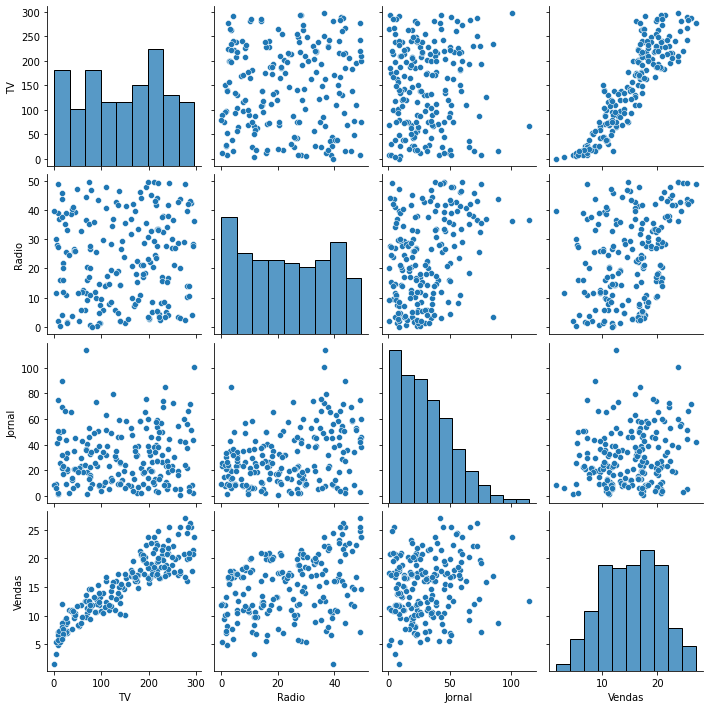

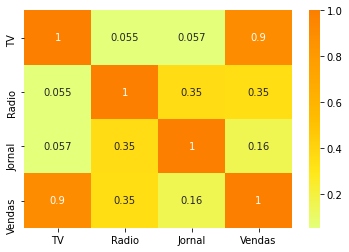

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(Tabela)
ply.show()
sns.heatmap(Tabela.corr(), cmap = 'Wistia', annot = True)
ply.show()

### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [89]:
from sklearn.model_selection import train_test_split

x= Tabela.drop(["Vendas"], axis=1)
y= Tabela["Vendas"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

# treino AI
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

## Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [91]:
# teste AI
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
mse_lin = metrics.mean_squared_error(y_test, test_pred_lin)
print("R² da Regressão Linear: %.2f%%" %(r2_lin))
print("MSE da Regressão Linear: %.4f" %(mse_lin))
r2_reg = metrics.r2_score(y_test, test_pred_rf)
mse_reg = metrics.mean_squared_error(y_test, test_pred_rf)
print("R² do Random Forest: %.2f%%" %(r2_reg))
print("MSE do Random Forest: %.4f" %(mse_reg))

R² da Regressão Linear: 0.91%
MSE da Regressão Linear: 2.3707
R² do Random Forest: 0.97%
MSE do Random Forest: 0.8783


## Visualização Gráfica das Previsões

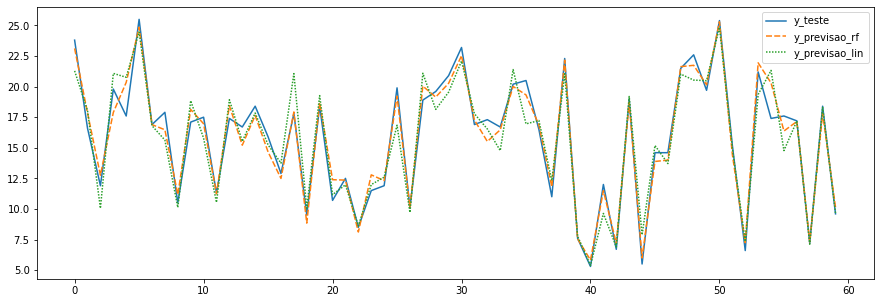

,y_teste,y_previsao_rf,y_previsao_lin
0,23.8,23.124,21.288161
1,16.6,17.856,18.042132
2,11.9,12.759,10.059590
3,19.8,17.886,21.082241
4,17.6,20.350,20.764760
5,25.5,24.857,24.471874
6,16.9,16.892,16.806436
7,17.9,16.474,15.628857
8,10.5,11.174,10.124799
9,17.1,18.133,18.846019


In [92]:
Tabela_resultado = pd.DataFrame()
# df_resultado.index = x_test
Tabela_resultado["y_teste"] = y_test
Tabela_resultado["y_previsao_rf"] = test_pred_rf
Tabela_resultado["y_previsao_lin"] = test_pred_lin
# display(df_resultado)
Tabela_resultado = Tabela_resultado.reset_index(drop=True)
plt.figure(figsize = (15, 5))
sns.lineplot(data=Tabela_resultado)
plt.show()
display(Tabela_resultado)

## Qual a importância de cada variável para as vendas?

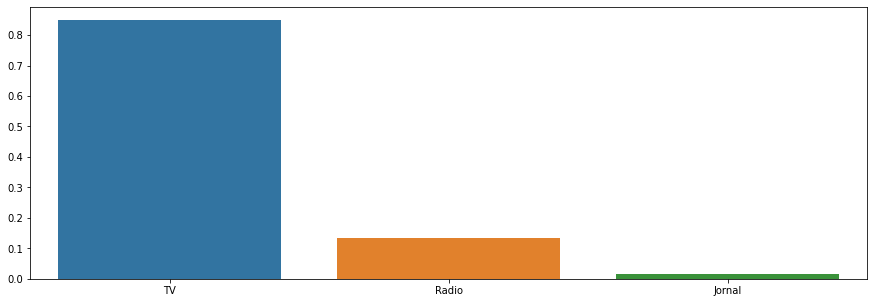

,0
TV,0.849781
Radio,0.132842
Jornal,0.017377


In [93]:
importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)
plt.figure(figsize = (15, 5))
sns.barplot(x = x_train.columns, y = rf_reg.feature_importances_)
plt.show()
display(importancia_features)

## Será que estamos investindo certo?

In [94]:
print(Tabela[["Radio","Jornal"]].sum())

Radio     4652.8
Jornal    6110.8
dtype: float64


#### Podemos observar que o radio dá mais retorno, porém a empresa está investindo mais em jornal, demonstrando um erro de investimento.

# Teste de previsões

In [120]:

previsão = rf_reg.predict([[282.1,15.7,8.7]])
print(previsão)

[20.315]
